<a href="https://colab.research.google.com/github/chekwube-ononuju/Externship-Web3-Analysis/blob/main/Frequency_Analysis_of_Smart_Contract_Risks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Frequency Analysis of Smart Contract Risks

Welcome to this interactive tutorial on conducting advanced frequency analysis using Python in Google Colab!

## Objective
The objective of this notebook is to teach you how to handle larger datasets and create dynamic visualizations to analyze the frequency of risk tags associated with smart contracts. This will involve loading data, performing data manipulation, and visualizing the results using Python libraries such as pandas, matplotlib, and seaborn.

## Before You Start
This notebook assumes you have some familiarity with basic programming concepts and a basic understanding of Python. If you are completely new to Python, I recommend reviewing Python basics before proceeding.

Let's get started by setting up our environment and loading the data!


### Step 1: Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

Please note that the dataset that will be downloaded below is a dummy dataset that has been designed for the tutorial. You need to use the actualy dataset provided to you for the analysis.

In [3]:
!gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n

Downloading...
From: https://drive.google.com/uc?id=1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
To: /content/webacy_risk_dataset.xlsx
100% 26.4k/26.4k [00:00<00:00, 69.0MB/s]


In [4]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Compiled Risk dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Compiled Risk dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [5]:
# Loading the dataset

df = pd.read_excel('/content/compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,True,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,False,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,False,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [6]:
# We can then visualize other aspects of the data.
# For example, check for data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Blog post link                              967 non-null    object 
 2   Audit website                               967 non-null    object 
 3   Chain                                       967 non-null    object 
 4   Is_closed_source                            967 non-null    bool   
 5   hidden_owner                                967 non-null    bool   
 6   anti_whale_modifiable                       967 non-null    bool   
 7   Is_anti_whale                               967 non-null    bool   
 8   Is_honeypot                                 967 non-null    bool   
 9   buy_tax                                     967 non-null    bool   
 10  sell_tax      

### Frequency Analysis

In [7]:
# Let's now look at the value counts of an individual risk tag: is_airdrop_scam

df['is_airdrop_scam'].value_counts()

,count
is_airdrop_scam,
False,902
True,65


Okay so we see that over 50% of the dataset has True for the column `is_airdrop_scam`. Note that this is a dummy dataset and in real world you won't have that many scams, atleast we can hope that we don't that many scams.

Now, let's define all the risk columns in our dataset so that we can then run the analysis on the same.

In [8]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [9]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-10-4db283aabe4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


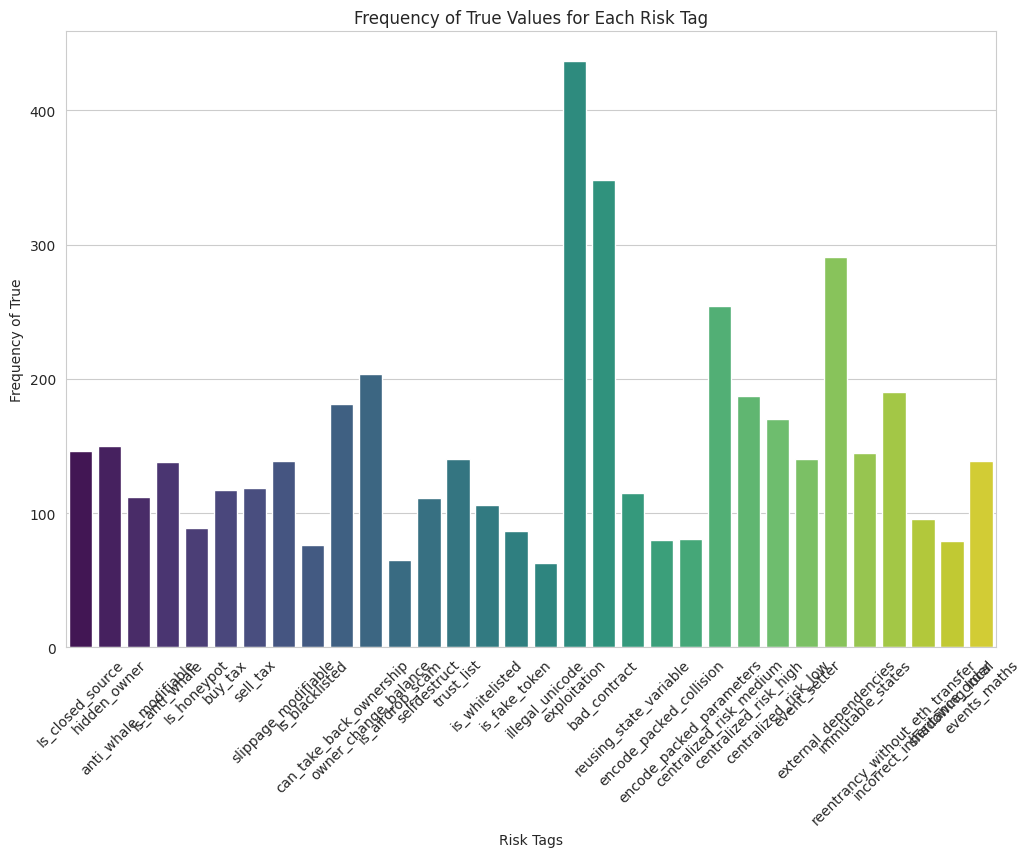

In [10]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()


This is the real dataset


In [20]:
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[False]

# Print the result
print(f"Frequency of 'False' values in 'is_closed_source': {frequencies}")

Frequency of 'False' values in 'is_closed_source': Is_closed_source                   821
hidden_owner                       817
anti_whale_modifiable              855
Is_anti_whale                      829
Is_honeypot                        878
buy_tax                            850
sell_tax                           848
slippage_modifiable                828
Is_blacklisted                     891
can_take_back_ownership            786
owner_change_balance               763
is_airdrop_scam                    902
selfdestruct                       856
trust_list                         827
is_whitelisted                     861
is_fake_token                      880
illegal_unicode                    904
exploitation                       530
bad_contract                       618
reusing_state_variable             851
encode_packed_collision            886
encode_packed_parameters           885
centralized_risk_medium            712
centralized_risk_high              778
centralized_r

# Conclusion
Great job! You have successfully completed a frequency analysis of risk tags in smart contracts using Python. You've learned how to load data, perform calculations, and visualize the results using some of the most powerful libraries in Python.

## Next Steps
- Try modifying the charts or calculations to explore other aspects of the data.
- Consider analyzing the frequency of 'False' values or other specific conditions.
- Use this notebook as a template for analyzing other datasets.

Remember, the skills you've learned here are applicable to a wide range of data analysis tasks. Keep practicing and exploring!

Thank you for following along, and happy coding!


In [23]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the columns again
print(df.columns)

Index(['project_name', 'Blog post link', 'Audit website', 'Chain',
       'Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')


In [25]:
import pandas as pd

# Load the dataset from the correct path in Colab
df = pd.read_excel('/content/compiled_risk_data.xlsx')

# Display the first few rows to check if the data is loaded correctly
print(df.head())

     project_name                                     Blog post link  \
0  Data Analytics  https://chainsecurity.com/security-audit/circl...   
1  Data Analytics  https://stackoverflow.com/questions/75030483/w...   
2  Data Analytics  https://stackoverflow.com/questions/71115106/s...   
3  Data Analytics  https://stackoverflow.com/questions/75030483/w...   
4  Data Analytics  https://stackoverflow.com/questions/69466137/h...   

                                       Audit website     Chain  \
0                          https://chainsecurity.com  Ethereum   
1  https://studygroup.moralis.io/t/compilation-er...  Ethereum   
2  https://ethereum.stackexchange.com/questions/1...  Ethereum   
3  https://studygroup.moralis.io/t/compilation-er...  Ethereum   
4  https://ethereum.stackexchange.com/questions/1...  Ethereum   

   Is_closed_source  hidden_owner  anti_whale_modifiable  Is_anti_whale  \
0             False         False                  False          False   
1             False 

Phi Coefficient for Binary Variables


In [27]:
import numpy as np
import scipy.stats

# Function to calculate the Phi coefficient
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)

    # Calculate the chi-squared statistic from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]

    # Total number of observations
    n = np.sum(np.sum(contingency_table))

    # Calculate the Phi coefficient
    phi = np.sqrt(chi2 / n)
    return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['Is_honeypot'], df['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.4437039256424274


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Point-Biserial Correlation

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

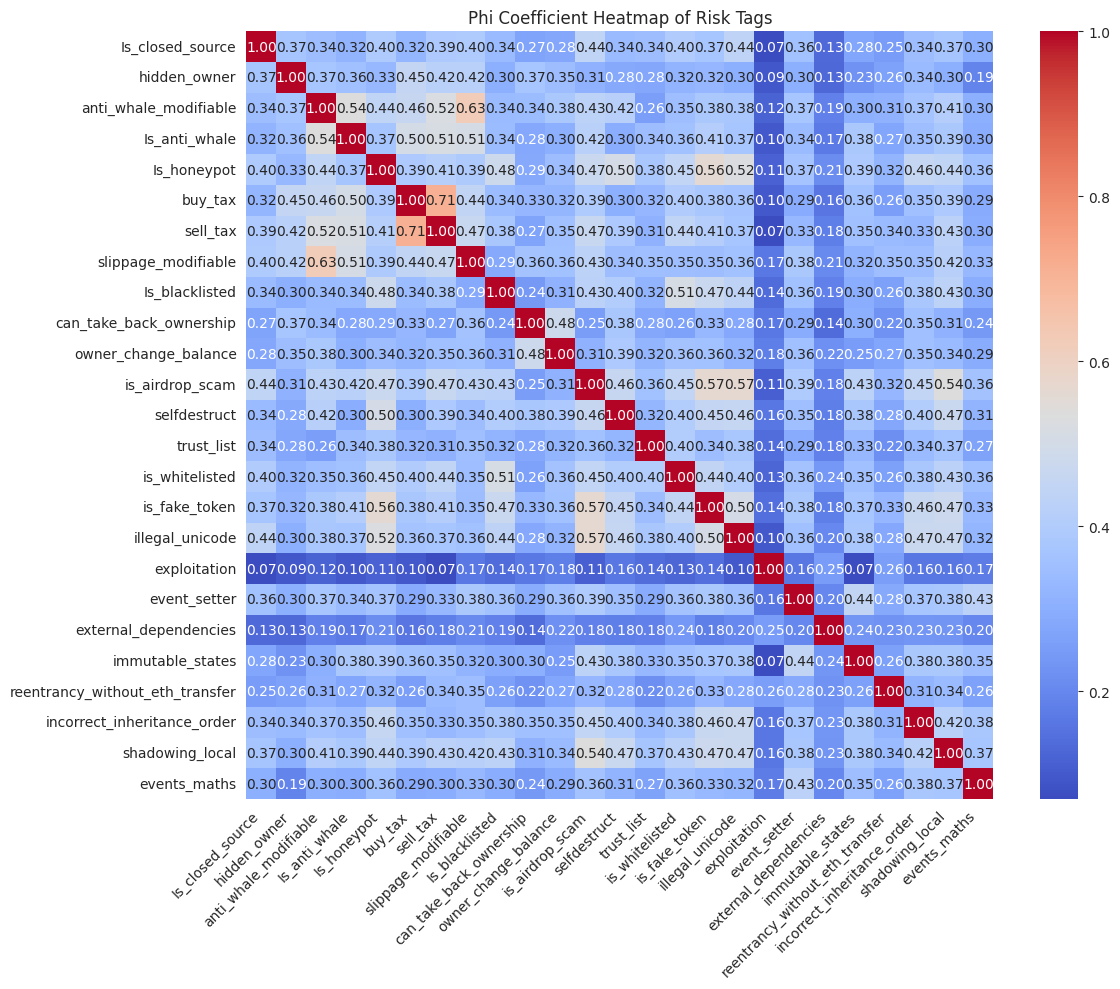

In [29]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Load the dataset (adjust the file path as necessary)
df = pd.read_excel('/content/compiled_risk_data.xlsx')  # Adjust if necessary

# Function to calculate the Phi coefficient
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    contingency_table = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# List of binary (boolean) columns
binary_variables = df.columns[df.dtypes == 'bool']  # Get all boolean columns

# Initialize an empty matrix for storing Phi coefficients
phi_matrix = pd.DataFrame(index=binary_variables, columns=binary_variables)

# Calculate the Phi coefficient for each pair of binary variables
for var1 in binary_variables:
    for var2 in binary_variables:
        phi_matrix.loc[var1, var2] = phi_coefficient(df[var1], df[var2])

# Convert the matrix to float for heatmap display
phi_matrix = phi_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(phi_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)  # Create heatmap
plt.title('Phi Coefficient Heatmap of Risk Tags')  # Add title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Ensure y-axis labels are upright
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

## Tips for Further Learning
- Explore the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for more advanced data manipulation techniques.
- Dive deeper into [matplotlib](https://matplotlib.org/stable/contents.html) and [seaborn](https://seaborn.pydata.org/) to discover more visualization styles and options.
- Participate in online forums and communities to enhance your learning and connect with other learners.
